In [111]:
from vectors import *
import vectors
import pygame
from draw2d import *
from draw3d import *
from math import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [2]:
class PolygonModel():
    def __init__(self,points):
        self.points=points
        self.angle=0
        self.x=0
        self.y=0
        self.vx=0
        self.vy=0

In [3]:
class Asteroids(PolygonModel):
    def __init__(self):
        sides=randint(5,9)
        vs=[vectors.to_cartesian((uniform(0.5,1.0),2*pi*i/sides))for i in range(0,sides)]
        super().__init__(vs)
        self.vx=uniform(-1,1)
        self.vy=uniform(-1,1)

In [4]:
def do_segments_intersect(s1,s2):
    u1,u2=s1
    v1,v2=s2
    l1,l2=distance(*s1),distance(*s2)
    try:
        x,y=intersection(u1,u2,v1,v2)
        return (distance(u1,(x,y))<=l1 and
                   distance(u2,(x,y))<=l1 and
                   distance(v1,(x,y))<=l2 and
                   distance(v2,(x,y))<=l2)
    except np.linalg.linalg.LinAlgError:
        return False

class PolygonModel():
    def __init__(self,points):
        self.points=points
        self.rotation_angle=0
        self.x=0
        self.y=0
        
    def transformed(self):
        rotated = [vectors.rotate2d(self.rotation_angle, v) for v in self.points]
        return [vectors.add((self.x,self.y),v) for v in rotated]
    
    def segments(self):
        point_count=len(self.points)
        points=self.transformed()
        return [(points[i],points[(i+1)%point_count])
               for i in range(0,point_count)]
    
    def does_intersect(self,other_segment):
        for segment in self.segments():
            if do_segments_intersect(other_segment,segment):
                return True
        return False
    
    def does_collide(self,other_poly):
        for other_segment in other_poly.segments():
            if self.does_intersect(other_segment):
                return True
        return False

    def move(self,milliseconds):
        dx,dy=self.vx*milliseconds/1000.0,self.vy*milliseconds/1000.0
        self.x,self.y=vectors.add((self.x,self.y),(dx,dy))
        if self.x<-10:
            self.x+=20
        if self.y<-10:
            self.y+=10
        if self.x>10:
            self.x-=20
        if self.y>10:
            self.y-=20

In [5]:
t=0
s=(0,0)
v=(1,0)
a=(0,0.2)

In [6]:
dt=2
steps=5

In [7]:
positions=[s]
for _ in range(0,5):
    t+=2
    s=add(s,scale(dt,v))
    v=add(v,scale(dt,a))
    positions.append(s)
arrows=[]
for i in range(len(positions)-1):
    arrows.append(Arrow2D(positions[i+1],positions[i]))

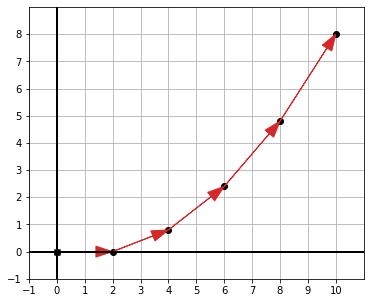

In [8]:
draw2d(Points2D(*positions),
     *arrows)

In [9]:
def Displacement_fitting(dt,steps,line='Arrow2D',points=True,color='blue'):
    t=0
    s=(0,0)
    v=(1,0)
    a=(0,0.2)
    positions=[s]
    for _ in range(0,steps):
        t+=dt
        s=add(s,scale(dt,v))
        v=add(v,scale(dt,a))
        positions.append(s)
    link=[]
    for i in range(len(positions)-1):
        if line=='Arrow2D':
            link.append(Arrow2D(positions[i+1],positions[i],color=color))
        if line=='Segment2D':
            link.append(Segment2D(positions[i+1],positions[i],color=color))
    for j in range(len(positions)):
        if points==False:
            break
        link.append(Points2D(positions[j]))
    return link

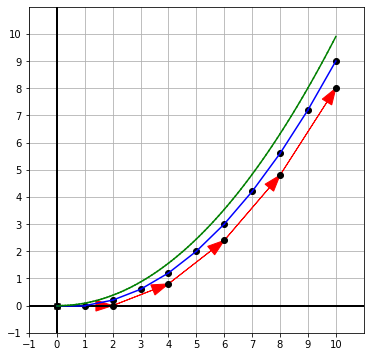

In [10]:
draw2d(
    *Displacement_fitting(2,5,color='red'),
    *Displacement_fitting(1,10,line='Segment2D'),
    *Displacement_fitting(0.1,100,line='Segment2D',points=False,color='green')
)

In [5]:
t=0
s=(0,0)
v=(1,0)
a=(0,0.2)

In [11]:
t=0
s=(0,0)
v=(1,0)
a=(0,0.2)
dt=0.1
steps=100
positions=[s]
for _ in range(0,steps):
    t+=dt
    s=add(s,scale(dt,v))
    v=add(v,scale(dt,a))
    positions.append(s)

In [6]:
dt=2
steps=5

In [12]:
positions[-1]

(9.99999999999998, 9.900000000000006)

In [13]:
t=0
s=(0,0)
v=(1,0)
a=(0,0.2)
dt=0.0001
steps=100_000
positions=[s]
for _ in range(0,steps):
    t+=dt
    s=add(s,scale(dt,v))
    v=add(v,scale(dt,a))
    positions.append(s)

In [14]:
positions[-1]

(9.999999999990033, 9.999899999993497)

In [15]:
def eulers_method(s0,v0,a,total_time,step_count):
    trajectory=[s0]
    s=s0
    v=v0
    dt=total_time/step_count
    for _ in range(0,step_count):
        s=add(s,scale(dt,v))
        v=add(v,scale(dt,a))
        trajectory.append(s)
    return trajectory

In [16]:
def eulers_method_overapprox(s0,v0,a,total_time,step_count):
    trajectory=[s0]
    s=s0
    v=v0
    dt=total_time/step_count
    for _ in range(0,step_count):
        v=add(v,scale(dt,a))
        s=add(s,scale(dt,v))
        trajectory.append(s)
    return trajectory

In [123]:
overapprox_list=eulers_method_overapprox((0,0),(1,0),(0,0.2),10,10)
overapprox_segment=[Segment2D(overapprox_list[i],overapprox_list[i+1],color='red') for i in range(len(overapprox_list)-1)]

In [124]:
def list_segment(overapprox_list,color='blue'):
    return [Segment2D(overapprox_list[i],overapprox_list[i+1],color=color) for i in range(len(overapprox_list)-1)]

In [125]:
overapprox_list_1000=list_segment(eulers_method_overapprox((0,0),(1,0),(0,0.2),10,1000),color='C1')

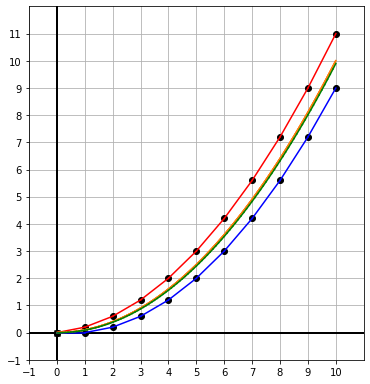

In [126]:
draw2d(
    Points2D(*overapprox_list),
    *overapprox_segment,
    *overapprox_list_1000,
    *Displacement_fitting(1,10,line='Segment2D'),
    *Displacement_fitting(0.1,100,line='Segment2D',points=False,color='green')
)

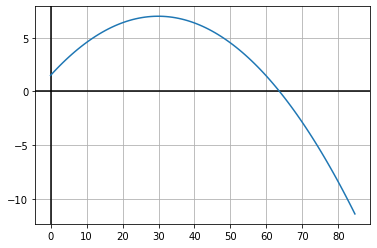

In [50]:
angle=20*pi/180
s0=(0,1.5)
v0=(30*cos(angle),30*sin(angle))
a=(0,-9.81)

result=eulers_method(s0,v0,a,3,100)
result_segment=[Segment2D(result[i],result[i+1],color='red') for i in range(len(result)-1)]

x_major_locator=MultipleLocator(10)#以每10显示
y_major_locator=MultipleLocator(5)#以每5显示
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.axvline(0,color='black')
plt.axhline(0,color='black')
x,y=zip(*result)
plt.plot(x,y)
plt.grid()

In [52]:
def baseball_trajectory(degree):
    radians=degree*pi/180
    s0=(0,0)
    v0=(30*cos(radians),30*sin(radians))
    a=(0,-9.81)
    return [(x,y) for (x,y) in eulers_method(s0,v0,a,10,1000) if y>=0]

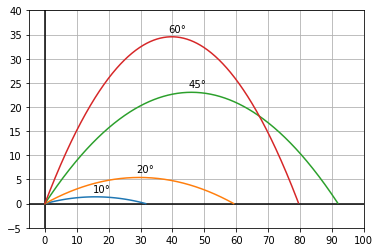

In [99]:
x_major_locator=MultipleLocator(10)#以每10显示
y_major_locator=MultipleLocator(5)#以每5显示
ax=plt.gca()
plt.axis([-5,100,-5,40])
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.axvline(0,color='black')
plt.axhline(0,color='black')
x_10,y_10=zip(*baseball_trajectory(10))
plt.plot(x_10,y_10)
plt.annotate('10°',xy=(x_10[y_10.index(max(y_10))],max(y_10)),xytext=(x_10[y_10.index(max(y_10))]-1,max(y_10)+1))
x_20,y_20=zip(*baseball_trajectory(20))
plt.plot(x_20,y_20)
plt.annotate('20°',xy=(x_20[y_20.index(max(y_20))],max(y_20)),xytext=(x_20[y_20.index(max(y_20))]-1,max(y_20)+1))
x_45,y_45=zip(*baseball_trajectory(45))
plt.plot(x_45,y_45)
plt.annotate('45°',xy=(x_45[y_45.index(max(y_45))],max(y_45)),xytext=(x_45[y_45.index(max(y_45))]-1,max(y_45)+1))
x_60,y_60=zip(*baseball_trajectory(60))
plt.plot(x_60,y_60)
plt.annotate('60°',xy=(x_60[y_60.index(max(y_60))],max(y_60)),xytext=(x_60[y_60.index(max(y_60))]-1,max(y_60)+1))
plt.grid()

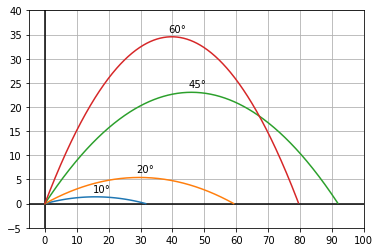

In [110]:
def plot_title(radians):
    x,y=zip(*baseball_trajectory(radians))
    plt.plot(x,y)
    plt.annotate('{}°'.format(radians),xy=(x[y.index(max(y))],max(y)),xytext=(x[y.index(max(y))]-1,max(y)+1))

x_major_locator=MultipleLocator(10)#以每10显示
y_major_locator=MultipleLocator(5)#以每5显示
ax=plt.gca()
plt.axis([-5,100,-5,40])
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plot_title(10)
plot_title(20)
plot_title(45)
plot_title(60)
plt.grid()

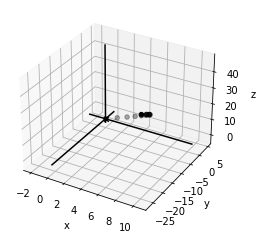

In [112]:
traj3d=eulers_method((0,0,0),(1,2,0),(0,-1,1),10,10)
draw3d(
    Points3D(*traj3d)
)

In [113]:
eulers_method((0,0,0),(1,2,0),(0,-1,1),10,1000)[-1]

(9.999999999999831, -29.949999999999644, 49.94999999999933)